In [1]:
import gensim
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance, euclidean_distance
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from gensim.summarization import keywords
from gensim.summarization import summarize

model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
#https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download

In [ ]:
# import pandas as pd

# df = pd.read_csv("training_set_rel3.tsv", sep="\t", encoding="ISO-8859-1")
# #df.head()

In [ ]:
# #t = df[df["essay_set"]==8]["essay"]
# i = 0
# for x in t:
#     if len(x)>5000:
#         f = open("./test/t_"+str(i)+".txt", 'w')
#         f.write(x)
#         f.close()
#         i+=1
# print(i)

In [129]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from summarization import Summarizer

summarizer = Summarizer("sample3")
sums = summarizer.summarize_all()

files = summarizer.files 
#print(files)

for sum in sums:
    print(len(sum))



10
20
14
15
6
13
13
13
9


In [130]:
corpus = []
d = dict()

i = 0
for sum in sums:
    for x in sum:
        corpus.append(x)
        d[x] = i
        i+=1
        
len(corpus)

113

In [ ]:
# sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
# sentence_president = 'The president greets the press in Chicago'.lower().split()

# model.wmdistance(sentence_obama, sentence_president)

In [131]:
# corpus = [
#     "Can you be more specific with your question?",
#     "Are you able to eliminate ambiguity from your question?",
#     "Could you be more specific?",
#     "Can you explain yourself more clearly?",
#     "Please be more specific",
#     "Will you restate your question more clearly?",
#     "Quick brown fox jumped over the lazy dog",
#     "The dog lay on the floor and the fox jumped over it",
#     "Unlike the dog, the fox was quick and brown and was able to jump over the dog",
#     "The dog was lazy and could not reach the fox which jumped over it",
#     "The dog could not match the fox's speed who easily jumped over it and disappeared"
# ]

data = []
for sentence in corpus:
    sentence = sentence.lower().split()
    #res = []
    res = 0
    n = 0
    for word in sentence:
        try:
            res+=model[word]
            #res.append(model[word])
            n+=1
        except:
            pass
    res/=n
    #print(n)
    #for i in range(50-n):
    #    res.append([0]*300)
    res = np.array(res)
    #print(res.shape)
    data.append(res.reshape(-1))
    
data = np.array(data)
#data

In [ ]:
[0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0]
[1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Patriotism to me, along with many others, means of course to have love for our homeland, our country, to support, serve and defend, to be inspired by, to change for the better and to care deeply for fellow Americans.


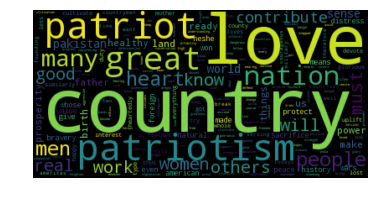

But there are people who pretend to be patriot but do anything for their own interest even at the cost of their native country.


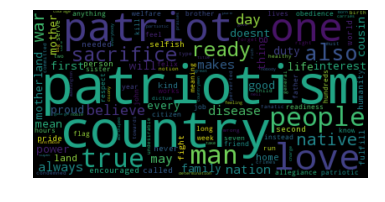

Patriotism means love and regard for the country.


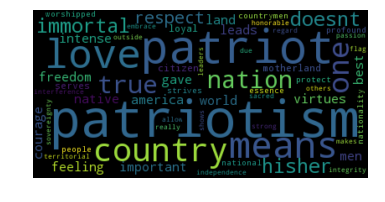

In [132]:
NUM_CLUSTERS = 3

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=euclidean_distance, repeats=100) #euclidean_distance #cosine_distance
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)
#print(kclusterer.means())

import re
from collections import Counter
for j in range(NUM_CLUSTERS):
    cluster = [corpus[i] for i in range(len(corpus)) if assigned_clusters[i]==j]

    text = []
    for i in range(len(cluster)):
        sentense = str(cluster[i]).lower().split(" ")
        for word in sentense:
            text.append(re.sub(r'[^\w\s]','',str(word)))
    cnt = Counter(text)
    f = open("cluster_"+str(j)+".txt", 'w')
    for item in text:
        f.write("%s\n" % item)
    f.close()
    
    text = open("cluster_"+str(j)+".txt").read()
    wordcloud = WordCloud().generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    m = 100
    l = 0
    for k in range(len(data)):
        t = euclidean_distance(data[k], kclusterer.means()[j])
        if t<m:
            m=t
            l=k
    print(corpus[l])
    plt.show()

In [112]:
weights = [0.5,-0.1, 0.3, ]

In [113]:
i = 0
for essay in sums:
    res = 0
    for sentance in essay:
        k = assigned_clusters[d[sentance]]
        #print(k)
        res+= weights[k]
    print(files[i], round(res,1))
    i+=1

01-Essay01 5.5
01-Essay02 4.0
01-Essay03 5.5
02-Essay01.txt 9.1
02-Essay02.txt 10.9
02-Essay03.txt 8.8
02-Essay04.txt 11.1
02-Essay05.txt 9.1
03-Essay01 1.1
03-Essay02 6.0
03-Essay03 4.3
03-Essay04 4.3
03-Essay05 2.7
03-Essay06 2.9
03-Essay07 0.3
03-Essay08 2.8
03-Essay09 0.9
